Score: 0.9848335547525863


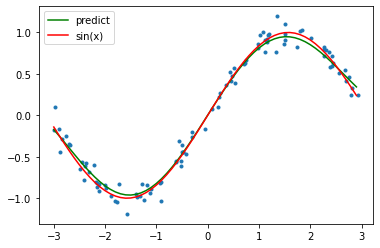

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import random

# 正弦波の回帰問題を SVM で解いてみる
# Xとして乱数、
# 正解データとしてsin(X)に正規分布ノイズを加えたものを用意する。
random.seed(1)
points = 100
x_max = 3
x_min = -3
X = random.rand(points) * (x_max - x_min) + x_min
y = np.sin(X) + np.array([random.randn() * 0.1 for _ in range(points)])
plot_x = np.arange(x_min, x_max, 0.1)

# 訓練データとテストデータの振り分け
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVR
svr = SVR(kernel='rbf')
# 学習
svr.fit(X_train, y_train)
# 評価
print('Score:', svr.score(X_test, y_test))

# 回帰曲線を図示してみる。

predict = svr.predict(plot_x.reshape(-1, 1))
plt.plot(plot_x, predict, c='g', label='predict')

plt.scatter(X, y, marker='.')
plt.plot(plot_x, np.sin(plot_x), label='sin(x)', c='r')
plt.legend()